# Práctica 3: Regresión lineal con BGD
***
Rodriguez Nuñez Diego Eduardo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def CalcularError(y_test, y_pred):
    return sum(abs((y_pred[i]-y_test[i]))for i in range(len(y_test)))

def Grafica1(x_test, predictions, y_test, iterations):
    plt.figure(figsize=(10,6))
    for i in range(iterations):
        plt.plot(x_test, predictions[i], label=f'Iteración {i+1}')
    plt.scatter(x_test, y_test, color='red', label='Datos de prueba')
    plt.title('Regresión Lineal')
    plt.xlabel('Terreno (m2)')
    plt.ylabel('Precio (MDP)')
    plt.legend()
    plt.show()

def Grafica2(errors, iterations):
    plt.figure(figsize=(10,6))
    plt.scatter(np.arange(1, iterations+1), errors, color='red')
    plt.title('Error de estimación')
    plt.xlabel('Iteración')
    plt.ylabel('Error')
    plt.show()

## Programa 1

1. Sin utilizar las bibliotecas de scikit-learn para regresión lineal elabora un programa en python que implemente BGD monovariable

2. Entrada:
    * Archivo.csv
    * Número de iteraciones
    * Peso inicial
    * alpha

3. Divide casas.csv en 70% para entrenamiento y 30% para pruebas, con los parametros shuffle=True y random_state=0

4. Salida:
    * Peso en cada iteración calculado con el conjunto de entrenamiento
    * y_test
    * y_pred en cada predicción
    * Error de predicción Σ𝐼=1:𝑛 |𝑦_𝑝𝑟𝑒𝑑𝑖 − 𝑦_𝑡𝑒𝑠𝑡|
    * Gráfica 1:
        * distribución de los datos de prueba
        * y_pred en cada iteración
    * Gráfica 2:
        * Error en cada iteración


In [3]:
data = pd.read_csv('casas.csv')
data.rename(columns={'Terreno (m2)':'X', 'Precio (MDP)':'Y'}, inplace=True)
data

,X,Y
0,440.0,1.01
1,616.0,1.42
2,381.0,0.88
3,963.0,2.21
4,431.0,0.99
5,255.0,0.59
6,594.0,1.37
7,625.0,1.44
8,708.0,1.63
9,468.0,1.08


In [4]:
x = data['X'].values
y = data['Y'].values
x,y

(array([440., 616., 381., 963., 431., 255., 594., 625., 708., 468.]),
 array([1.01, 1.42, 0.88, 2.21, 0.99, 0.59, 1.37, 1.44, 1.63, 1.08]))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)

In [6]:
def BGD_Mono(x,y,iterations,alpha,weight,x_test,y_test):
    wi = 0
    sumA = 0
    predictions = []
    errors = []
    for i in range(0,iterations):
        for j in range(0,len(x)):
            sumA += ((wi*x[j])-y[j])*x[j]
        wi = wi - alpha*(2*sumA)
        wi = wi - weight
        weight = wi
        print(f'Iteracion {i+1}: w = {weight}\n')
        y_pred = [weight * xi for xi in x_test]
        print(f'Prediccion : {y_pred}')
        error = CalcularError(y_test, y_pred)
        print(f'Error = {error}\n')
        predictions.append(y_pred)
        errors.append(error)
    print(f'Y_test {y_test}')
    Grafica1(x_test, predictions, y_test, iterations)
    Grafica2(errors, iterations)

In [7]:
alpha = 0.00000007
iterations = 4
weight = 0.0

Iteracion 1: w = 0.0008143827999999999

Prediccion : [0.3102798468, 0.5765830223999999, 0.35099898679999997]
Error = 2.262138144

Iteracion 2: w = 0.00134054665030748

Prediccion : [0.5107482737671498, 0.9491070284176958, 0.5777756062825239]
Error = 1.4623690915326304

Iteracion 3: w = 0.001680495378805175

Prediccion : [0.6402687393247717, 1.1897907281940638, 0.7242935082650304]
Error = 0.945647024216134

Iteracion 4: w = 0.0019001325468463942

Prediccion : [0.7239505003484762, 1.3452938431672472, 0.8189571276907959]
Error = 0.6117985287934806

Y_test [0.88 1.63 0.99]


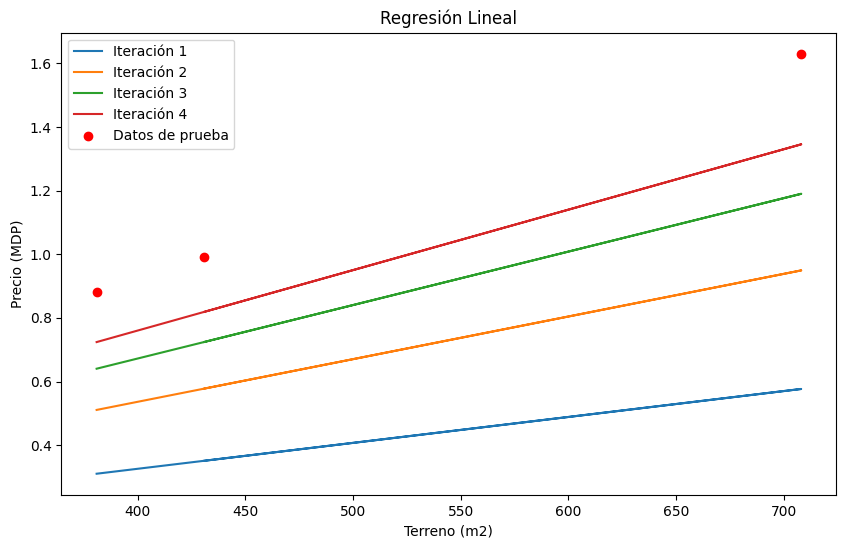

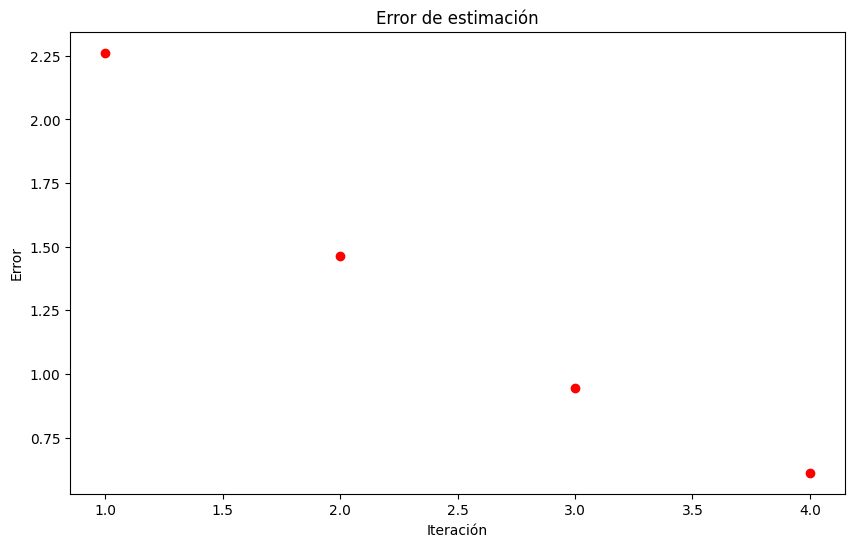

In [8]:
BGD_Mono(x_train,y_train,iterations,alpha,weight,x_test,y_test)

## Programa 2

1. Sin utilizar las bibliotecas de scikit-learn para regresión lineal elabora un programa en python que implemente BGD multivariable

2. Entrada:
    * Dataset_multivariable.csv
    * Número de iteraciones
    * Peso inicial
    * alpha

3. Divide Dataset_multivariable .csv en 70% para entrenamiento y 30% para pruebas, con los parametros shuffle=True y random_state=0

4. Salida:
    * Peso en cada iteración calculado con el conjunto de entrenamiento
    * y_test
    * y_pred en cada predicción
    * Error de predicción Σi=1:𝑛 |𝑦_𝑝𝑟𝑒𝑑𝑖 − 𝑦_𝑡𝑒𝑠𝑡|
    * Gráfica 1:
        * Error de distribución Σi=1:𝑛 |𝑦_𝑝𝑟𝑒𝑑𝑖 − 𝑦_𝑡𝑒𝑠𝑡𝑖| de cada iteración

In [9]:
def BGD_Multi(x,y,iterations,alpha,weight,x_test,y_test):
    w = [0.0]*len(x[0])
    predictions = []
    errors = []
    for k in range(iterations):
        gradient = [0.0]*len(weight)
        for i in range(len(x)):
            prediction= np.dot(x[i],weight)
            for j in range(len(weight)):
                gradient[j] += 2 * (prediction - y[i]) * x[i][j]
        for j in range(len(weight)):
            w[j] -= alpha * gradient[j]
        print(f'Iteracion {k+1}: w = {w}')
        y_pred = [np.dot(xi,w) for xi in x_test]
        print(f'Prediccion : {y_pred}')
        error = CalcularError(y_test, y_pred)
        print(f'Error = {error}\n')
        predictions.append(y_pred)
        errors.append(error)
    print(f'Y_test {y_test}')
    Grafica2(errors, iterations)
    

In [10]:
data2 = pd.read_csv('Dataset_multivariable.csv')
data2

,x1,x2,x3,x4,x5,y
0,1.0,0.4,-12.0,12.0,10.2,11.6
1,1.0,0.6,-15.0,16.0,11.9,14.5
2,1.0,0.8,-18.0,20.0,13.6,17.4
3,1.0,1.0,-21.0,24.0,15.3,20.3
4,1.0,1.2,-24.0,28.0,17.0,23.2
5,1.0,1.4,-27.0,32.0,18.7,26.1
6,1.0,1.6,-30.0,36.0,20.4,29.0
7,1.0,1.8,-33.0,40.0,22.1,31.9
8,1.0,2.0,-36.0,44.0,23.8,34.8
9,1.0,2.2,-39.0,48.0,25.5,37.7


In [11]:
x = data2.drop('y', axis=1).values
y = data2['y'].values
x,y

(array([[  1. ,   0.4, -12. ,  12. ,  10.2],
        [  1. ,   0.6, -15. ,  16. ,  11.9],
        [  1. ,   0.8, -18. ,  20. ,  13.6],
        [  1. ,   1. , -21. ,  24. ,  15.3],
        [  1. ,   1.2, -24. ,  28. ,  17. ],
        [  1. ,   1.4, -27. ,  32. ,  18.7],
        [  1. ,   1.6, -30. ,  36. ,  20.4],
        [  1. ,   1.8, -33. ,  40. ,  22.1],
        [  1. ,   2. , -36. ,  44. ,  23.8],
        [  1. ,   2.2, -39. ,  48. ,  25.5]]),
 array([11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. , 31.9, 34.8, 37.7]))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)

In [13]:
alpha = 0.000006
iterations = 4
weight = [0.0,0.0,0.0,0.0,0.0]

Iteracion 1: w = [0.0020532, 0.0030832800000000007, -0.0585684, 0.0698784, 0.040169640000000006]
Prediccion : [3.002626128, 6.147369192, 4.050873816]
Error = 62.199130864

Iteracion 2: w = [0.0041064, 0.0061665600000000015, -0.1171368, 0.1397568, 0.08033928000000001]
Prediccion : [6.005252256, 12.294738384, 8.101747632]
Error = 48.998261727999996

Iteracion 3: w = [0.0061595999999999995, 0.009249840000000002, -0.1757052, 0.20963519999999997, 0.12050892000000002]
Prediccion : [9.007878384, 18.442107575999998, 12.152621448]
Error = 35.797392591999994

Iteracion 4: w = [0.0082128, 0.012333120000000003, -0.2342736, 0.2795136, 0.16067856000000003]
Prediccion : [12.010504512, 24.589476768, 16.203495264]
Error = 22.596523455999993

Y_test [17.4 34.8 23.2]


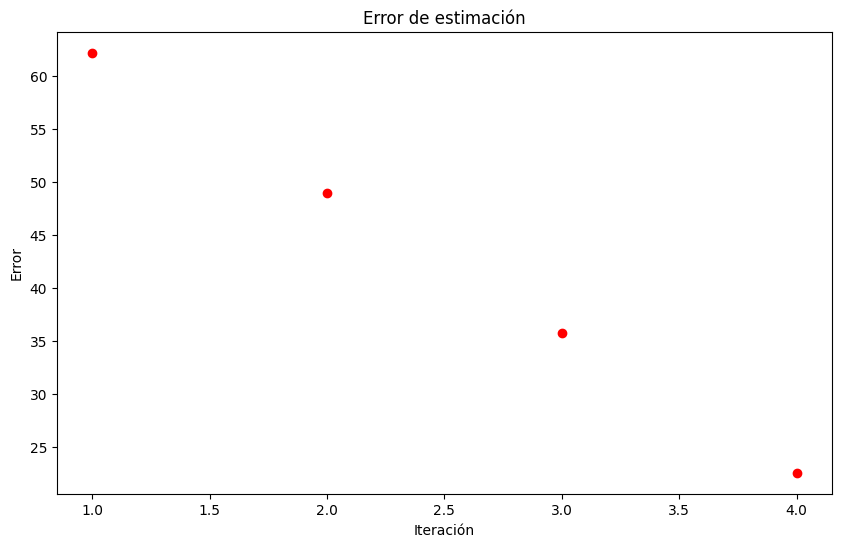

In [14]:
BGD_Multi(x_train,y_train,iterations,alpha,weight,x_test,y_test)